In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn import datasets

df_boston = datasets.load_boston()
data = df_boston.data
target = df_boston.target

In [57]:
df_boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [58]:
data.shape

(506, 13)

In [55]:
target.shape

(506,)

In [42]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [43]:
def estimate_coef(x, y): 
    n = np.size(x)

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1)

In [44]:
n = data.shape[1]
bz, bo = np.zeros(n), np.zeros(n)
for i in range(0,n):
    bz[i], bo[i]= estimate_coef(target,data[:,i])
    print(df_boston.feature_names[i] ,bz[i], bo[i])

CRIM 11.796535750221953 -0.36315992225760474
ZN -9.232123843502883 0.9140344043653923
INDUS 19.26713009078781 -0.36082285169964134
CHAS -0.03989141154686732 0.004840114917442714
NOX 0.6760110257189916 -0.005383970584287271
RM 5.087638671836057 0.05312235406004025
AGE 94.57134975280444 -1.1537155289537466
DIS 2.5056685425580527 0.05722208439742013
RAD 17.690521974010913 -0.36130052964930554
TAX 601.7022595834844 -8.585930338658002
PTRATIO 21.14888155446683 -0.11953007179345138
B 282.08837053877613 3.3100919614246513
LSTAT 25.558859226334487 -0.5727558209834802


<Figure size 432x288 with 0 Axes>

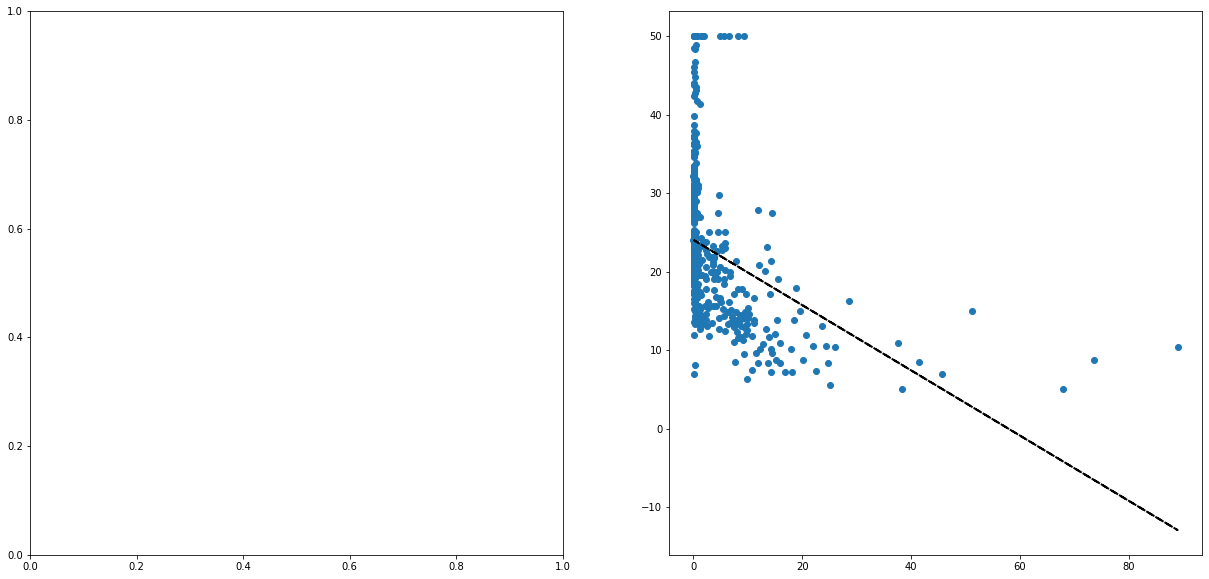

In [46]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))
plt.scatter(data[:,0], target)
z = np.polyfit(data[:,0],target, 1)
p = np.poly1d(z)
plt.plot(data[:,0],p(data[:,0]),"k--", linewidth=2)   

plt.show()
plt.close()